In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_excel('Gadarwara_Q.xlsx')
df.drop(columns = ['Unnamed: 18'], inplace = True)
df

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Grid Point,weights
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.60,0.00,0.00,0.00,RF_1,0.013302
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.60,1.60,0.00,0.00,RF_2,0.010567
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.60,1.60,1.60,0.00,RF_3,0.086394
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.60,1.60,1.60,1.60,RF_4,0.273084
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.60,1.60,1.60,1.60,RF_5,0.104194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2020-05-27,2020,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.08,0.09,0.10,0.11,NaN,NaN
15702,2020-05-28,2020,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.07,0.08,0.09,0.10,NaN,NaN
15703,2020-05-29,2020,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.05,0.07,0.08,0.09,NaN,NaN
15704,2020-05-30,2020,5,30,1.1,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.099727,0.05,0.05,0.07,0.08,NaN,NaN


In [3]:
part1 = df.drop(df.index[12418:15706])
part2 = df.drop(df.index[0:12418])
print(part1.shape, part2.shape)

(12418, 20) (3288, 20)


In [4]:
part1

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Grid Point,weights
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.0,0.0,0.0,RF_1,0.013302
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,1.6,0.0,0.0,RF_2,0.010567
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,1.6,1.6,0.0,RF_3,0.086394
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,1.6,1.6,1.6,RF_4,0.273084
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,1.6,1.6,1.6,RF_5,0.104194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,2011-05-27,2011,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12414,2011-05-28,2011,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12415,2011-05-29,2011,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12416,2011-05-30,2011,5,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [5]:
part2

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Grid Point,weights
12418,2011-06-01,2011,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,NaN,NaN
12419,2011-06-02,2011,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,NaN,NaN
12420,2011-06-03,2011,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,NaN,NaN
12421,2011-06-04,2011,6,4,16.9,10.7,3.2,0.0,9.6,6.8,0.0,10.5,12.0,3.474289,0.00,0.00,0.00,0.00,NaN,NaN
12422,2011-06-05,2011,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2020-05-27,2020,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.08,0.09,0.10,0.11,NaN,NaN
15702,2020-05-28,2020,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.07,0.08,0.09,0.10,NaN,NaN
15703,2020-05-29,2020,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.05,0.07,0.08,0.09,NaN,NaN
15704,2020-05-30,2020,5,30,1.1,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.099727,0.05,0.05,0.07,0.08,NaN,NaN


In [6]:
med1 = part1['Q'].median()
mean1 = part1['Q'].mean()
std1 = part1['Q'].std()
CV1 = (std1/mean1)*100
print(med1, mean1, std1, CV1)

4.3 44.78323510809566 185.9561235984892 415.2360211352241


In [7]:
med2 = part2['Q'].median()
mean2 = part2['Q'].mean()
std2 = part2['Q'].std()
CV2 = (std2/mean2)*100
print(med2, mean2, std2, CV2)

2.427101 48.892871626639895 131.60054475584676 269.16100522952826


In [8]:
zero_count_1 = (part1['Q'] == 0).sum() 
perc_0values1 = (zero_count_1/12418)*100
print(zero_count_1, perc_0values1)

360 2.899017555161862


In [9]:
zero_count_2 = (part2['Q'] == 0).sum() 
perc_0values2 = (zero_count_2/3288)*100
print(zero_count_2, perc_0values2)

697 21.19829683698297


# MLR STARTS HERE

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

[0.5037709] 22.222744606287854 0.45433566366042355 9447.324638079808


<function matplotlib.pyplot.show(close=None, block=None)>

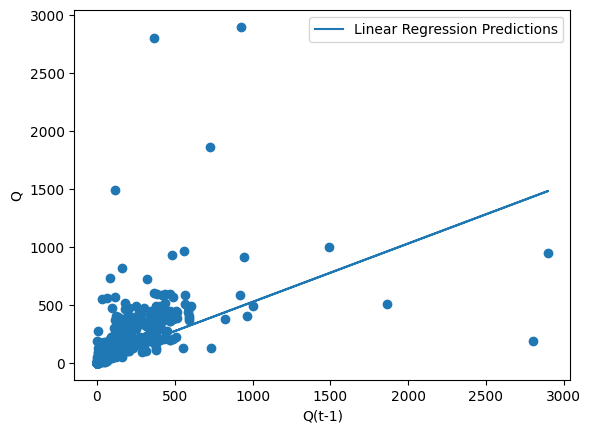

In [11]:
# independent variable = Q(t-1)
model1 = linear_model.LinearRegression()
model1.fit(part1[['Q(t-1)']], part1.Q)
Q_pred1 = model1.predict(part2[['Q(t-1)']])
R2_score1 = r2_score(part2[['Q']], Q_pred1)
MSE1 = mean_squared_error(part2[['Q']], Q_pred1)
print(model1.coef_, model1.intercept_, R2_score1, MSE1)
plt.scatter(part2[['Q(t-1)']], part2[['Q']])
plt.plot(part2[['Q(t-1)']], Q_pred1, label='Linear Regression Predictions')
plt.xlabel('Q(t-1)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.36497527] 28.438461607962342 0.3350615727061288 11512.3689943154


<function matplotlib.pyplot.show(close=None, block=None)>

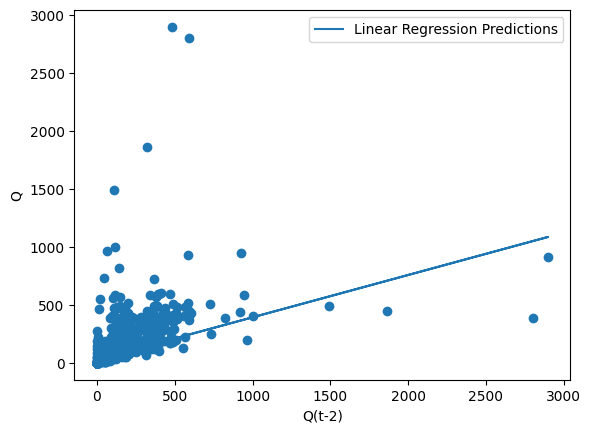

In [12]:
# independent variable = Q(t-2)
model2 = linear_model.LinearRegression()
model2.fit(part1[['Q(t-2)']], part1.Q)
Q = part2[['Q']]
Q_pred2 = model2.predict(part2[['Q(t-2)']])
R2_score2 = r2_score(part2[['Q']], Q_pred2)
MSE2 = mean_squared_error(part2[['Q']], Q_pred2)
print(model2.coef_, model2.intercept_, R2_score2, MSE2)
plt.scatter(part2[['Q(t-2)']], part2[['Q']])
plt.plot(part2[['Q(t-2)']], Q_pred2, label='Linear Regression Predictions')
plt.xlabel('Q(t-2)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.33721046] 29.681859972481142 0.28782793968574794 12330.145483013326


<function matplotlib.pyplot.show(close=None, block=None)>

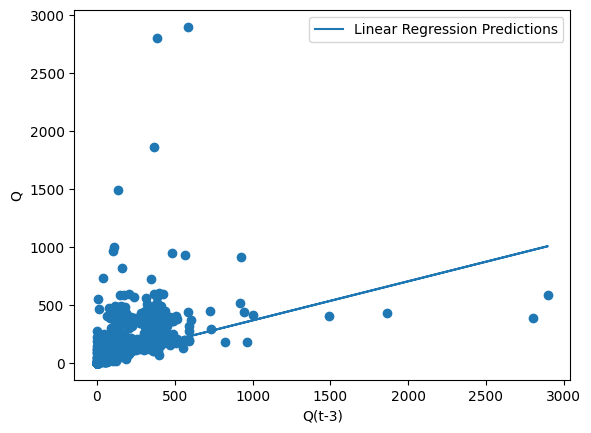

In [13]:
# independent variable = Q(t-3)
model3 = linear_model.LinearRegression()
model3.fit(part1[['Q(t-3)']], part1.Q)
Q = part2[['Q']]
Q_pred3 = model3.predict(part2[['Q(t-3)']])
R2_score3 = r2_score(part2[['Q']], Q_pred3)
MSE3 = mean_squared_error(part2[['Q']], Q_pred3)
print(model3.coef_, model3.intercept_, R2_score3, MSE3)
plt.scatter(part2[['Q(t-3)']], part2[['Q']])
plt.plot(part2[['Q(t-3)']], Q_pred3, label='Linear Regression Predictions')
plt.xlabel('Q(t-3)')
plt.ylabel('Q')
plt.legend()
plt.show

In [14]:
# independent variable = Q(t-1), Q(t-2)
model4 = linear_model.LinearRegression()
model4.fit(part1[['Q(t-1)', 'Q(t-2)']], part1.Q)
Q_pred4 = model4.predict(part2[['Q(t-1)', 'Q(t-2)']])
R2_score4 = r2_score(part2[['Q']], Q_pred4)
MSE4 = mean_squared_error(part2[['Q']], Q_pred4)
print(model4.coef_, model4.intercept_, R2_score4, MSE4)

[0.42870624 0.14900555] 18.9114323683132 0.49816025303433853 8688.57040883463


In [15]:
# independent variable = Q(t-1), Q(t-3)
model5 = linear_model.LinearRegression()
model5.fit(part1[['Q(t-1)', 'Q(t-3)']], part1.Q)
Q_pred5 = model5.predict(part2[['Q(t-1)', 'Q(t-3)']])
R2_score5 = r2_score(part2[['Q']], Q_pred5)
MSE5 = mean_squared_error(part2[['Q']], Q_pred5)
print(model5.coef_, model5.intercept_, R2_score5, MSE5)

[0.4392022  0.17691251] 17.191624946871766 0.5043412897740307 8581.555423997082


In [16]:
# independent variable = Q(t-2), Q(t-3)
model6 = linear_model.LinearRegression()
model6.fit(part1[['Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred6 = model6.predict(part2[['Q(t-2)', 'Q(t-3)']])
R2_score6 = r2_score(part2[['Q']], Q_pred6)
MSE6 = mean_squared_error(part2[['Q']], Q_pred6)
print(model6.coef_, model6.intercept_, R2_score6, MSE6)

[0.26145078 0.20549916] 23.871706159484607 0.39427815856748893 10487.126416902665


In [17]:
# independent variable = Q(t-1), Q(t-2), Q(t-3)
model7 = linear_model.LinearRegression()
model7.fit(part1[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred7 = model7.predict(part2[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']])
R2_score7 = r2_score(part2[['Q']], Q_pred7)
MSE7 = mean_squared_error(part2[['Q']], Q_pred7)
print(model7.coef_, model7.intercept_, R2_score7, MSE7)

[0.40712498 0.08691376 0.14483528] 16.172389687995164 0.5191371108529153 8325.388920690591
